In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/pintoza/Desktop/dev/data-science/sales_optimization/data/processed/df_processed.csv')

df.head()

,order_number,sales_channel,warehouse_code,procured_date,order_date,ship_date,delivery_date,sales_team_id,customer_id,store_id,product_id,order_quantity,discount_applied,unit_cost,unit_price
0,101,In-Store,4,2017-12-31,2018-05-31,2018-06-14,2018-06-19,6,15,259,12,5,0.075,1001,1963
1,102,Online,3,2017-12-31,2018-05-31,2018-06-22,2018-07-02,14,20,196,27,3,0.075,3349,3940
2,103,Distributor,4,2017-12-31,2018-05-31,2018-06-21,2018-07-01,21,16,213,16,1,0.050,781,1776
3,104,Wholesale,3,2017-12-31,2018-05-31,2018-06-02,2018-06-07,28,48,107,23,8,0.075,1465,2325
4,105,Distributor,3,2018-04-10,2018-05-31,2018-06-16,2018-06-26,22,49,111,26,8,0.100,1476,1822


count    7991.000000
mean        4.525341
std         2.312631
min         1.000000
25%         3.000000
50%         5.000000
75%         7.000000
max         8.000000
Name: order_quantity, dtype: float64


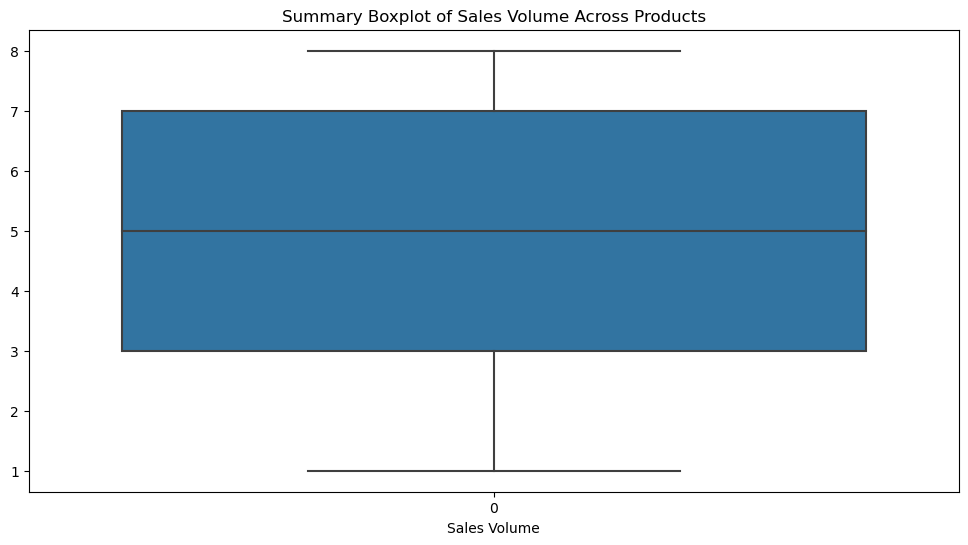

In [8]:
# Calculate metrics
sales_volume_summary = df['order_quantity'].describe()
print(sales_volume_summary)

# Generate Boxplot for Sales Volume
plt.figure(figsize=(12, 6))
sns.boxplot(df['order_quantity'])
plt.title('Summary Boxplot of Sales Volume Across Products')
plt.xlabel('Sales Volume')
plt.savefig('/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/product_analysis/sales_volume_summary.png')
plt.show()

# Metrics: Mean, Median, Standard Deviation of Sales Volume

count    7991.000000
mean     2284.534226
std      1673.090573
min       168.000000
25%      1032.000000
50%      1849.000000
75%      3611.000000
max      6566.000000
Name: unit_price, dtype: float64


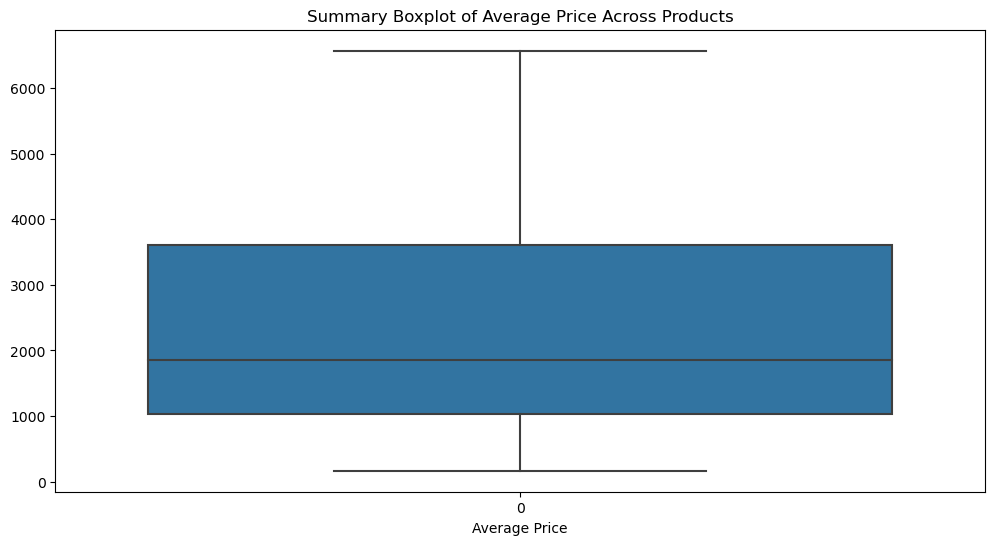

In [9]:
# Calculate metrics
avg_price_summary = df['unit_price'].describe()
print(avg_price_summary)

# Generate Boxplot for Average Price
plt.figure(figsize=(12, 6))
sns.boxplot(df['unit_price'])
plt.title('Summary Boxplot of Average Price Across Products')
plt.xlabel('Average Price')
plt.savefig('/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/product_analysis/avg_price_summary.png')
plt.show()

# Metrics: Mean, Median, Standard Deviation of Average Price

count    7991.000000
mean        0.373702
std         0.132261
min         0.149038
25%         0.260013
50%         0.370000
75%         0.489906
max         0.602210
Name: profit_margin, dtype: float64


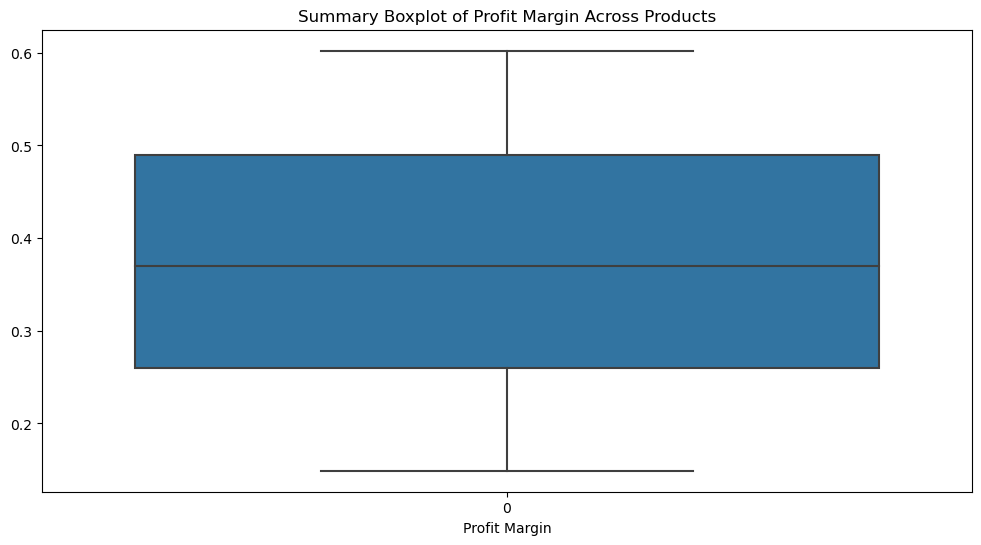

In [10]:
# Calculate metrics
df['profit_margin'] = (df['unit_price'] - df['unit_cost']) / df['unit_price']
profit_margin_summary = df['profit_margin'].describe()
print(profit_margin_summary)

# Generate Boxplot for Profit Margin
plt.figure(figsize=(12, 6))
sns.boxplot(df['profit_margin'])
plt.title('Summary Boxplot of Profit Margin Across Products')
plt.xlabel('Profit Margin')
plt.savefig('/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/product_analysis/profit_margin_summary.png')
plt.show()

# Metrics: Mean, Median, Standard Deviation of Profit Margin


In [11]:
from reportlab.lib.pagesizes import letter, landscape
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Paragraph, Image
from reportlab.lib.styles import getSampleStyleSheet

# Create a PDF file
pdf = SimpleDocTemplate(
    "/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/insights/Product_Analysis_Insights.pdf",
    pagesize=letter
)

# Set the styles
styles = getSampleStyleSheet()
styleN = styles["BodyText"]

# Add Title
elements = []
elements.append(Paragraph("Product Analysis Insights", styles["Heading1"]))

# Insert insights text
insights_text = """
1. Average Volume across product line: <br/>
   - Volumes are generally normally distributed<br/>
   
<br/>

2. Average Price across product line: <br/>
   - Prices are slightly right skewed, with a fairly wide range of prices, with most products leaning on the cheaper end of the range<br/>

<br/>

3. Average Profit Margin across product line: <br/>
   - Profit margins varies widely, although it is quite normally distributed across the product line <br/>
   
"""
elements.append(Paragraph(insights_text, styleN))

# Insert Images (Your charts saved as PNG files)
img_path1 = "/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/product_analysis/sales_volume_summary.png"
img1 = Image(img_path1, width=200, height=200)
elements.append(img1)

img_path2 = "/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/product_analysis/avg_price_summary.png"
img2 = Image(img_path2, width=200, height=200)
elements.append(img2)

img_path3 = "/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/product_analysis/profit_margin_summary.png"
img3 = Image(img_path3, width=200, height=200)
elements.append(img3)

# Generate PDF
pdf.build(elements)